# Reduccion de Dimensionalidad de los Datos
## Analisis de Componentes Pricipales (PCA)


In [1]:
import numpy as np
# Importar modulo de algebra lineal
from scipy import linalg as la

In [2]:
# Crear dataset de valoraciones de rendimiento, potencia y comodidad, expresados en una escala de 1 a 10, de un conjunto de vehiculos
datos=np.array([[7.,4.,3.],
                [6.,3.,5.],
                [8.,6.,1.],
                [8.,5.,7.],
                [7.,2.,9.],
                [5.,3.,3.],
                [9.,5.,8.],
                [7.,4.,5.],
                [8.,2.,2.],
                [4.,1.,8]])

In [3]:
# Calcula la matriz de covarianza
datos -= datos.mean(axis=0)
# Para calcular la covarianza
cov=np.cov(datos,rowvar=False)

In [4]:
# Calcula los valores y vectores propios de la matriz de covarianza
evals,evecs=la.eig(cov)

In [5]:
# Determina el numero de componentes a considerar
num_componentes=2
# Ordenar valores y vectores propios
clave_ordenada=np.argsort(evals)[::-1][:num_componentes]
evals,evecs=evals[clave_ordenada],evecs[:,clave_ordenada]


In [6]:
print("Valores propios ordenaros",evals)
print("Vectores propios ordenadors",evecs)

Valores propios ordenaros [8.27394258+0.j 3.67612927+0.j]
Vectores propios ordenadors [[-0.1375708   0.69903712]
 [-0.25045969  0.66088917]
 [ 0.95830278  0.27307986]]


In [7]:
#Multiplica datos originales con vectores propios
principales_componentes=np.dot(datos,evecs)
print("Principales componentes",principales_componentes)

Principales componentes [[-2.15142276 -0.17311941]
 [ 0.15321328 -0.98688598]
 [-4.7065185   1.30153634]
 [ 1.29375788  2.27912632]
 [ 4.0993133   0.1435814 ]
 [-1.62582148 -2.23208282]
 [ 2.11448986  3.2512433 ]
 [-0.2348172   0.37304031]
 [-2.74637697 -1.06894049]
 [ 3.80418259 -2.88749898]]


# Particionamiento de datos usando agrupamiento de k medias

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
#importar libreria k-means
from sklearn.cluster import KMeans
# crear un dataframe de conjunto conocidos su abcisa y ordana
data = pd.DataFrame({"X":[12,15,18,10,8,9,12,20],"Y":[6,16,17,8,7,6,9,18]})
# Define numero de cliusters
num_clusters=2



In [32]:
# Crea y ajusat el modelo de KMeans
km=KMeans(n_clusters=num_clusters)
km.fit(data)

KMeans(n_clusters=2)

In [33]:
#Predice variable objetivo
pred=km.predict(data)

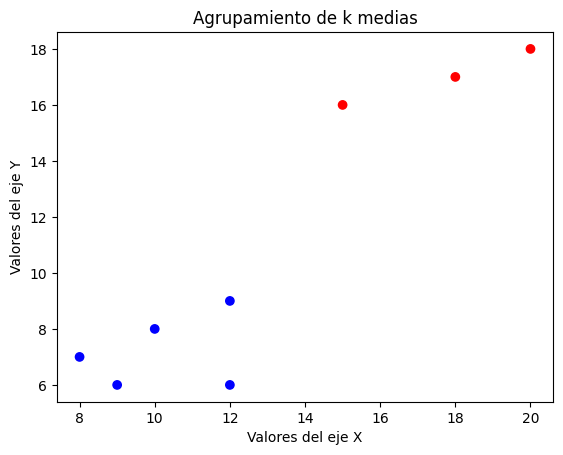

In [35]:
# Grafica los clusters
plt.scatter(data.X,data.Y,c=pred,marker='o',cmap="bwr_r")
#Establece titulo de la grafuca
plt.title("Agrupamiento de k medias")
#Establece etiqueta dek eje X
plt.xlabel("Valores del eje X")
plt.ylabel("Valores del eje Y")
plt.show()


# Agrupamiento Jeraquico

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
#importa dendograma
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage


In [37]:
data = pd.DataFrame({"X":[12,15,18,10,8,9,12,20],"Y":[6,16,17,8,7,6,9,18]})

Text(0, 0.5, 'Distancia')

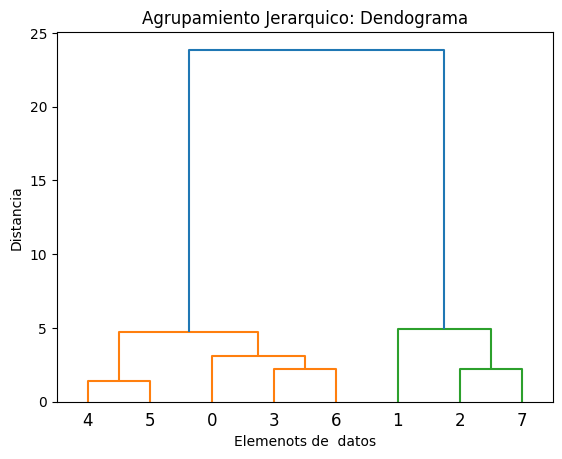

In [40]:
# crear un dendograma usando linkage y el metodo ward
dendrogram_plot = dendrogram(linkage(data,method='ward'))
plt.title("Agrupamiento Jerarquico: Dendograma")
#Establece etiqueta dek eje X
plt.xlabel("Elemenots de  datos")
plt.ylabel("Distancia")
